## Plotting For Group Question: Runtime & Profitability
##### Steven Zych & Caleb Elgut
This notebook takes the finished .csv file from the data cleaning notebook and uses it to produce plots that show the correlations between runtime & gross and runtime & ROI.

---

First we import our necessary libraries and the .csv file of our cleaned data.

In [1]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv_files = glob('zippedData/*.csv')
csv_dfs = [pd.read_csv(f) for f in csv_files]
len(csv_dfs)

1

In [3]:
# Drop an erroneous column that appeared while exporting the .csv file previously.

df = csv_dfs[0].drop('Unnamed: 0', axis = 1)
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,start_year,runtime_minutes,genres
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,2011,136.0,"Action,Adventure,Fantasy"
1,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,2019,113.0,"Action,Adventure,Sci-Fi"
2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,2015,141.0,"Action,Adventure,Sci-Fi"
3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,2018,149.0,"Action,Adventure,Sci-Fi"
4,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...
1514,"Jan 27, 2017",Emily,"$27,000","$3,547","$3,547",tt4393036,2017,83.0,Drama
1515,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",tt1945044,2015,91.0,"Horror,Mystery,Thriller"
1516,"Dec 1, 2015",Dutch Kills,"$25,000",$0,$0,tt2759066,2015,90.0,"Crime,Drama,Thriller"
1517,"Nov 25, 2011",The Ridges,"$17,300",$0,$0,tt1781935,2011,89.0,"Drama,Horror,Thriller"


In [4]:
# This code strips the punctuation from our money columns,
# which are currently stored as strings, and casts them
# as integers which we can work with mathematically.

def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int')
    return df

money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    df = convert_amt_to_int(df, col)

In [5]:
# Printing the head to confirm the strings became int.
# They did!

df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,start_year,runtime_minutes,genres
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136.0,"Action,Adventure,Fantasy"
1,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi"
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi"
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi"
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,2017,120.0,"Action,Adventure,Fantasy"


We're going to calculate ROI (return on investment) real quick as a better metric of success.

In [6]:
# Open two lists to hold our ROI values.
roi_list_domestic = []
roi_list_worldwide = []

# Use a for loop to iterate over the DataFrame and produce a value for each
# list from each row.
for i in range(0,1519):
    prod = df['production_budget'][i]
    
#   Loop for domestic ROI
    domestic_gross = df['domestic_gross'][i]
    roi_d = ((domestic_gross-prod)/prod)*100
    roi_list_domestic.append(roi_d)
    
#   Loop for worldwide ROI
    worldwide_gross = df['worldwide_gross'][i]
    roi_g = ((worldwide_gross-prod)/prod)*100
    roi_list_worldwide.append(roi_g)

Let's check that these numbers make sense. The first two movies in our DataFrame flopped domestically, and consequently show negative values (remember these are percents) for their ROI. The next one was a domestic success, etc. The numbers make sense!

In [7]:
print(roi_list_domestic[0:5])
print(roi_list_worldwide[0:5])

[-41.28985021919143, -87.7821857142857, 38.84025045372051, 126.27182733333333, -23.65856833333333]
[154.6672856794934, -57.21075714285714, 324.38413883847545, 582.7114, 118.64840299999999]


Now we add those lists as columns to our DataFrame.

In [8]:
df['roi_d'] = roi_list_domestic

In [9]:
df['roi_w'] = roi_list_worldwide

In [10]:
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,start_year,runtime_minutes,genres,roi_d,roi_w
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,2011,136.0,"Action,Adventure,Fantasy",-41.289850,154.667286
1,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,2019,113.0,"Action,Adventure,Sci-Fi",-87.782186,-57.210757
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",38.840250,324.384139
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi",126.271827,582.711400
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,2017,120.0,"Action,Adventure,Fantasy",-23.658568,118.648403


### Time to visualize!
Let's make some basic plots to look at runtime's relaitonships.
###### Note: One film (The Gallows, 2015) was so successful it was omitted from the following plots. It had an ROI of over 22,000% and its presence on the graph stretched the y-axis so thin the rest of the scatter plot became a pancake.

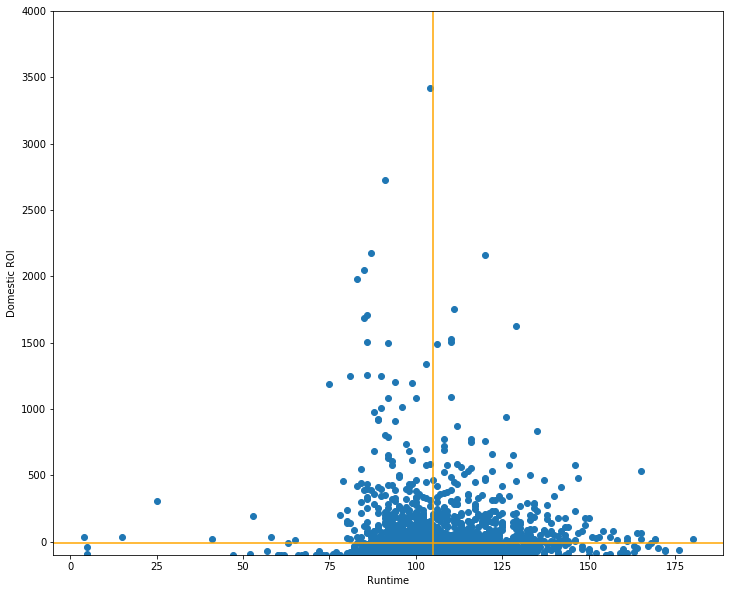

In [11]:
# Domestic ROI vs. runtime
# Orange lines are medians
x = df.runtime_minutes
y = df.roi_d
plt.figure(figsize=(12,10))
plt.scatter(x,y)
plt.axvline(df.runtime_minutes.median(), color='orange')
plt.axhline(df.roi_d.median(), color='orange')
plt.ylim(-100,4000)
plt.xlabel('Runtime')
plt.ylabel('Domestic ROI')
plt.show()

Sidenote: The ROI for just domestic releases has a median of just below 0. Release those movies worldwide!

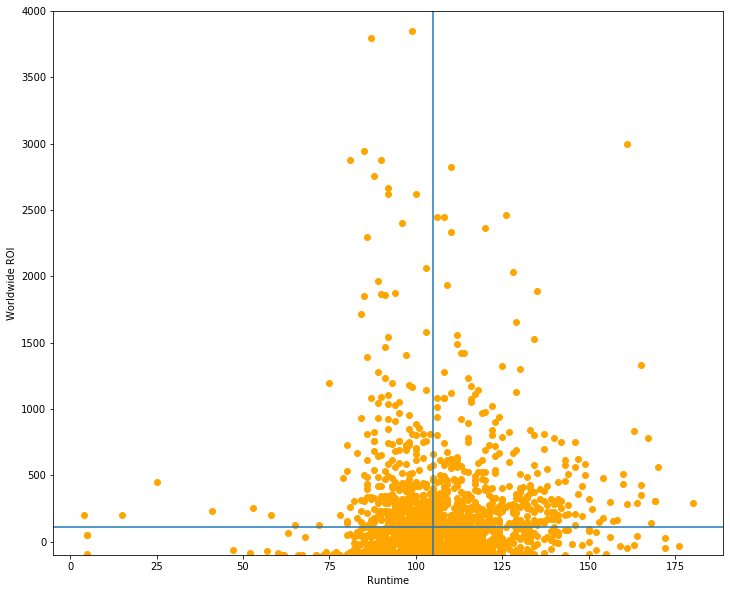

In [12]:
# Worldwide ROI vs. runtime
# Blue lines are medians
x = df.runtime_minutes
y = df.roi_w
plt.figure(figsize=(12,10))
plt.scatter(x,y, color='orange')
plt.axvline(df.runtime_minutes.median())
plt.axhline(df.roi_w.median())
plt.ylim(-100,4000)
plt.xlabel('Runtime')
plt.ylabel('Worldwide ROI')
plt.show()

We see a higher median on ROI when we release worldwide and generally higher ROI values. (Worldwide includes domestic, by the way.) Runtime isn't seeming to have a massive effect on ROI, however.

Most the best-ROI films are within the same range of runtimes where almost all other films are. In other words, we cannot generalize that "Films between ~80 and ~140 minutes have higher ROI than films outside that range" when there are comparatively few films outside that range at all.

Let's instead get more granular, and look at ROI/min and bin that data by value counts.

In [16]:
# Too many unique runtimes to make separate bins for each.
# We'll instead bin them in 30 minute chunks.
df.runtime_minutes.nunique()

119

In [22]:
# Our spread of runtimes is 4-180 min. We'll end up with 6 bins.
df.runtime_minutes.describe()

count    1519.000000
mean      106.753785
std        19.101972
min         4.000000
25%        94.000000
50%       105.000000
75%       117.500000
max       180.000000
Name: runtime_minutes, dtype: float64

In [41]:
# Make a column in dataframe for what runtime bin each movie's in.

bin_list = []
for i in range(0,1519):
    time = df['runtime_minutes'][i]
    bin_list.append((time//30)+1)
    
# +1 on the floor division because we don't want a 0 group for plot.

bin_list[:5]

[5.0, 4.0, 5.0, 5.0, 5.0]

In [69]:
# Iterating a list of average ROI by runtime bin.

avg_roi_by_bin = []
for i in range(1,7):
    val = np.average(df[df['bin'] == i]['roi_w'])
    avg_roi_by_bin.append(val)

In [70]:
avg_roi_by_bin

[140.79096140186203,
 75.82514147300695,
 494.89591142276646,
 226.07856149692225,
 252.96344075457233,
 298.4219270824716]